# Ejemplo regresión lineal simple


Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

## Librerias 
- Pandas para procesamiento de de datos
- Numpy para operaciones matemáticas
- Matplotlib y Seaborn para graficar
- Scipy,  Sklearn y Starmodels para procesamiento y modelo de los datos

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##  Datos

In [3]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
            "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
            "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
            "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
            "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
        5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
        5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


### Representación gráfica
El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

Text(0.5, 1.0, 'Distribución de bateos y runs')

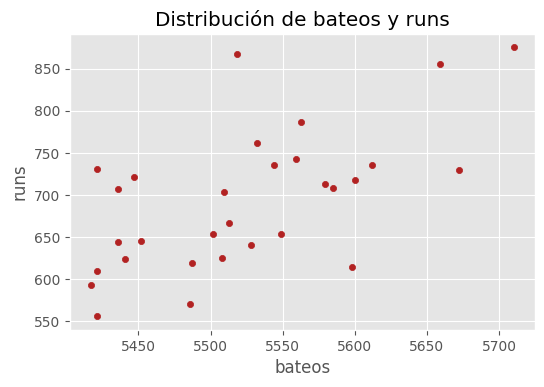

In [5]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs')

In [9]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791978


1. Coeficiente de correlación de Pearson (0.6106):

- El coeficiente de correlación de Pearson es un número que varía entre -1 y 1.
- Una correlación de 1 indica una correlación positiva perfecta (a medida que una variable aumenta, la otra también aumenta en línea recta).
- Una correlación de -1 indica una correlación negativa perfecta (a medida que una variable aumenta, la otra disminuye en línea recta).
- Un coeficiente de 0 indica que no hay correlación lineal.

En este caso, el coeficiente de correlación de Pearson es 0.6106, lo que sugiere una correlación positiva moderada entre las dos variables.

2. P-value (0.0003388):

- El valor p (p-value) es la probabilidad de observar un valor del estadístico de prueba tan extremo como, o más extremo que, el valor observado bajo la hipótesis nula.
- Un valor p pequeño (generalmente < 0.05) sugiere que puedes rechazar la hipótesis nula de que no hay correlación significativa.

En este caso, el valor p es muy pequeño (0.0003388), lo que indica que hay evidencia significativa para rechazar la hipótesis nula de que no hay correlación entre las dos variables. En otras palabras, parece haber una correlación significativa entre las variables.

### Ajuste del modelo¶

Se ajusta un modelo empleando como variable respuesta ```runs``` y como predictor ```bateos```. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. 

Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [11]:

# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [12]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


Las predicciones del modelo se comparan con los valores reales en el conjunto de prueba, y el RMSE proporciona una medida de cuán bien se ajustan las predicciones a los datos reales. Un RMSE más bajo indica un mejor rendimiento del modelo, ya que implica que las predicciones están más cerca de los valores reales en promedio. En tu caso, un RMSE de aproximadamente 59.34 indica que el modelo, en promedio, tiene un error de alrededor de 59.34 unidades al predecir los valores de la variable de respuesta en el conjunto de prueba.

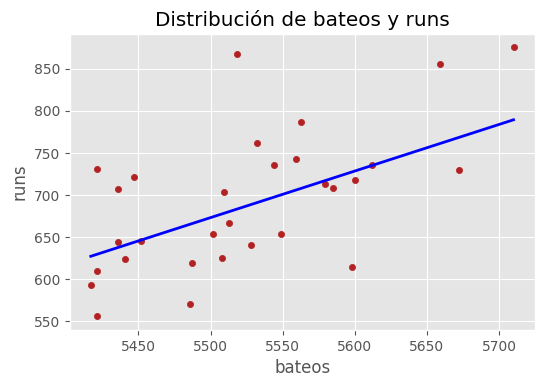

In [13]:
# Gráfico de dispersión
fig, ax = plt.subplots(figsize=(6, 3.84))
datos.plot(x='bateos', y='runs', c='firebrick', kind='scatter', ax=ax)
ax.set_title('Distribución de bateos y runs')

# Línea de regresión lineal
x_values = np.linspace(datos['bateos'].min(), datos['bateos'].max(), 100)
y_values = modelo.intercept_ + modelo.coef_[0] * x_values
plt.plot(x_values, y_values, color='blue', linewidth=2)

plt.show()